In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [13]:
concrete = pd.read_csv("C:\Aalesh and Mandar\Datasets\Cases\Concrete Strength\Concrete_Data.csv")

In [14]:
concrete.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [15]:
x = house.drop("Strength", axis=1)
y = house["Strength"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2022, test_size = 0.3)

In [17]:
dtr = DecisionTreeRegressor( random_state = 2022, max_depth = 2)
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)
print(r2_score(y_test, y_pred))

0.4270941483720333


plt.figure(figsize=(40,20))
plot_tree(dtc, feature_names = x.columns, class_names=["0","1"], fontsize=14)
plt.show()

In [18]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2022)
dtr = DecisionTreeRegressor(random_state = 2022)
params = {"max_depth" : [2,3,4,5,None],
          "min_samples_split" : [2,5,10],
          "min_samples_split" : [1,5,10]}
gcv = GridSearchCV(dtr, param_grid = params, verbose = 3, scoring = "r2", cv = kfold)
gcv.fit(x, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ..max_depth=2, min_samples_split=5;, score=0.425 total time=   0.0s
[CV 2/5] END ..max_depth=2, min_samples_split=5;, score=0.441 total time=   0.0s
[CV 3/5] END ..max_depth=2, min_samples_split=5;, score=0.453 total time=   0.0s
[CV 4/5] END ..max_depth=2, min_samples_split=5;, score=0.498 total time=   0.0s
[CV 5/5] END ..max_depth=2, min_samples_split=5;, score=0.487 total time=   0.0s
[CV 1/5] END .max_depth=2, min_samples_split=10;, score=0.425 total time=   0.0s
[CV 2/5] END .max_depth=2, min_samples_split=10;

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0

GridSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_split': [1, 5, 10]},
             scoring='r2', verbose=3)

In [19]:
print(gcv.best_params_)
print(gcv.best_score_)
best_model = gcv.best_estimator_

{'max_depth': None, 'min_samples_split': 5}
0.8499614669673818


[0.36567268 0.11043257 0.01046446 0.11057723 0.02484697 0.0321148
 0.02321728 0.32267402]


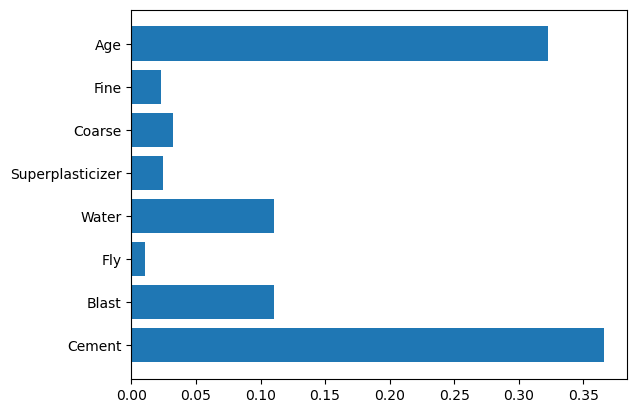

In [20]:
print(best_model.feature_importances_)
imps = best_model.feature_importances_
plt.barh(x.columns, imps)
plt.show()

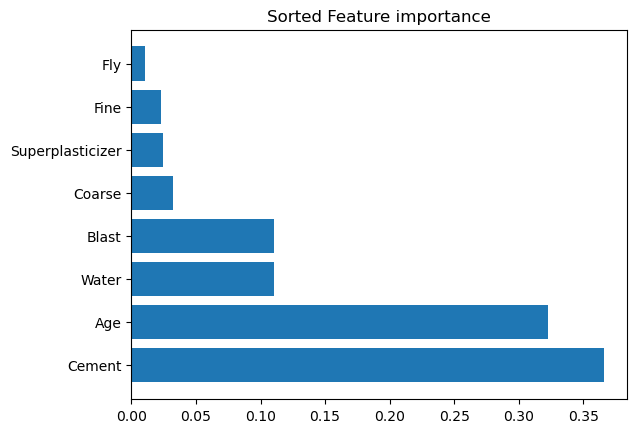

In [21]:
i_sorted = np.argsort(-imps)
n_sorted = x.columns[i_sorted]
imp_sort = imps[i_sorted]
plt.barh(n_sorted, imp_sort)
plt.title("Sorted Feature importance")
plt.show()